In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

In [4]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim/ 2.)
    return tf.random_normal(shape=size, stddev = xavier_stddev)


In [26]:
X = tf.placeholder(tf.float32, [None, 784] , name='X')

W1_dis = tf.Variable(xavier_init([784,128]),name='W1_dis')
b1_dis = tf.Variable(tf.zeros(shape=[128]), name='b1_dis')

W2_dis = tf.Variable(xavier_init([128,1]),name='W2_dis')
b2_dis = tf.Variable(tf.zeros(shape=[1]), name='b2_dis')

theta_dis = [W1_dis,W2_dis,b1_dis,b2_dis]

In [58]:
# 생성 네트워크
Z = tf.placeholder(tf.float32, shape=[None, 100], name='Z')

W1_gen = tf.Variable(xavier_init([100,128]),name='W1_gen')
b1_gen = tf.Variable(tf.zeros(shape=[128]), name='b1_gen')

W2_gen = tf.Variable(xavier_init([128,784]),name='W2_gen')
b2_gen = tf.Variable(tf.zeros(shape=[784]), name='b2_gen')

theta_gen = [W1_gen,W2_gen,b1_gen,b2_gen]

In [59]:
def random_Z(z1,z2):
    return np.random.uniform(-1., 1., size=[z1,z2])

In [60]:
def gen(z):
    h1_gen = tf.nn.relu(tf.matmul(z, W1_gen)+ b1_gen)
    log_prob_gen = tf.matmul(h1_gen, W2_gen)+ b2_gen
    prob_gen = tf.nn.sigmoid(log_prob_gen)
    return prob_gen



In [61]:
def dis(x):
    h1_dis = tf.nn.relu(tf.matmul(x, W1_dis)+ b1_dis)
    logit_dis = tf.matmul(h1_dis, W2_dis)+ b2_dis
    prob_dis = tf.nn.sigmoid(logit_dis)
    return prob_dis,logit_dis

In [62]:
def plot(samples):
    fig = plt.figure(figsize=(4,4))
    grid = gridspec.GridSpec(4,4)
    grid.update(wspace=0.1, hspace=0.1)

    for i, sample in enumerate(samples):
        ax = plt.subplot(grid[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28,28), cmap='gray')
    return fig

In [63]:
sample_gen = gen(Z)
real_dis, logit_real_dis = dis(X)
fake_dis, logit_fake_dis = dis(sample_gen)


In [64]:
loss_real_dis = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits = logit_real_dis, labels = tf.ones_like(logit_real_dis)
))

loss_fake_dis = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits = logit_fake_dis, labels = tf.zeros_like(logit_fake_dis)
))

loss_dis = loss_real_dis+ loss_fake_dis
loss_gen = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits = logit_fake_dis
    ,labels=tf.ones_like(logit_fake_dis)
))

In [65]:
solver_dis = tf.train.AdamOptimizer().minimize(loss_dis, var_list = theta_dis)
solver_gen = tf.train.AdamOptimizer().minimize(loss_gen, var_list = theta_gen)

In [66]:
batch_size = 128
dim_Z = 100

In [67]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

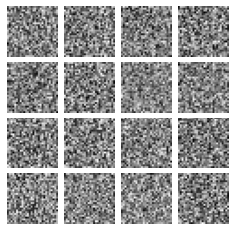

Iteration:0
Discriminator loss: 1.32
Generator loss: 2.92



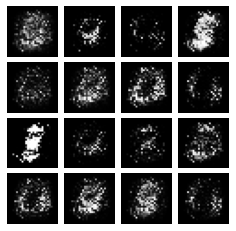

Iteration:2000
Discriminator loss: 0.0196
Generator loss: 6.05



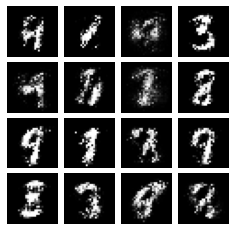

Iteration:4000
Discriminator loss: 0.135
Generator loss: 6.6



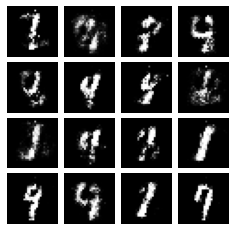

Iteration:6000
Discriminator loss: 0.449
Generator loss: 4.92



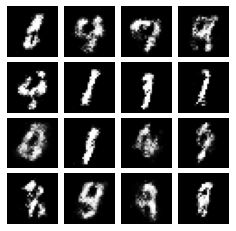

Iteration:8000
Discriminator loss: 0.372
Generator loss: 3.64



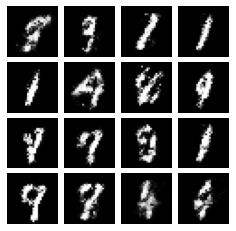

Iteration:10000
Discriminator loss: 0.533
Generator loss: 2.81



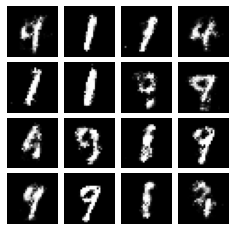

Iteration:12000
Discriminator loss: 0.518
Generator loss: 2.76



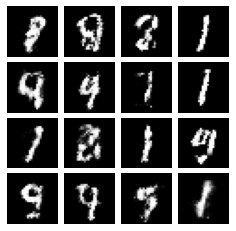

Iteration:14000
Discriminator loss: 0.62
Generator loss: 2.74



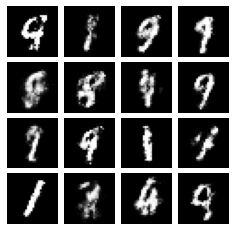

Iteration:16000
Discriminator loss: 0.488
Generator loss: 2.69



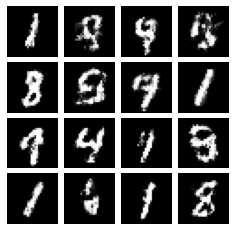

Iteration:18000
Discriminator loss: 0.473
Generator loss: 2.51



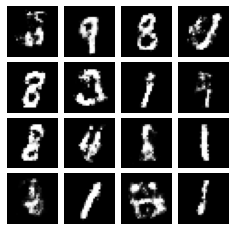

Iteration:20000
Discriminator loss: 0.69
Generator loss: 2.26



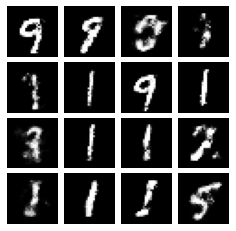

Iteration:22000
Discriminator loss: 0.544
Generator loss: 2.39



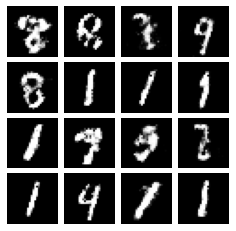

Iteration:24000
Discriminator loss: 0.639
Generator loss: 2.19



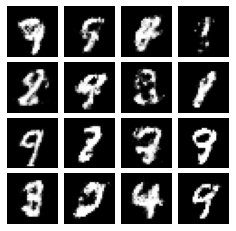

Iteration:26000
Discriminator loss: 0.674
Generator loss: 1.99



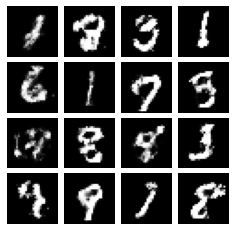

Iteration:28000
Discriminator loss: 0.439
Generator loss: 2.41



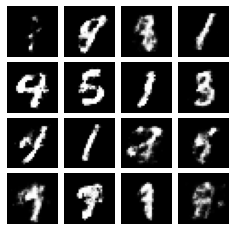

Iteration:30000
Discriminator loss: 0.505
Generator loss: 2.72



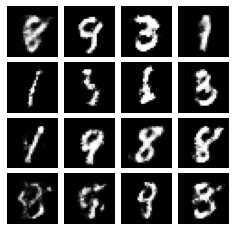

Iteration:32000
Discriminator loss: 0.674
Generator loss: 2.28



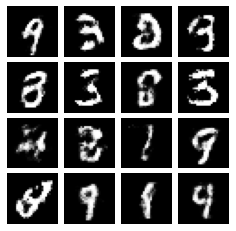

Iteration:34000
Discriminator loss: 0.754
Generator loss: 2.51



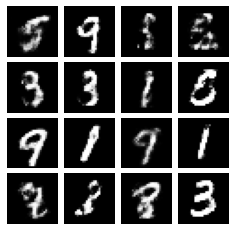

Iteration:36000
Discriminator loss: 0.581
Generator loss: 2.7



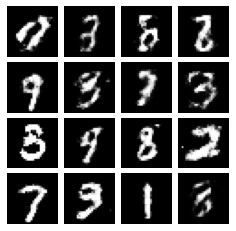

Iteration:38000
Discriminator loss: 0.598
Generator loss: 2.4



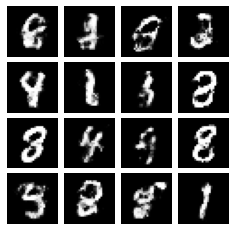

Iteration:40000
Discriminator loss: 0.782
Generator loss: 2.65



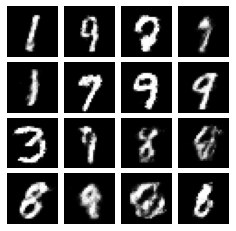

Iteration:42000
Discriminator loss: 0.636
Generator loss: 2.5



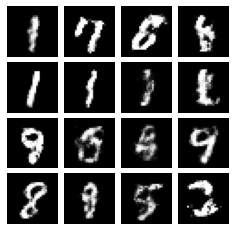

Iteration:44000
Discriminator loss: 0.551
Generator loss: 2.37



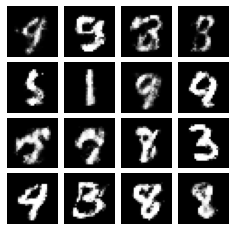

Iteration:46000
Discriminator loss: 0.516
Generator loss: 2.37



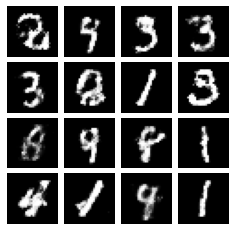

Iteration:48000
Discriminator loss: 0.557
Generator loss: 2.34



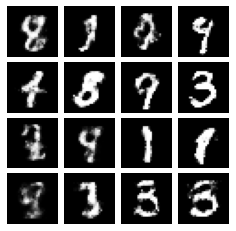

Iteration:50000
Discriminator loss: 0.801
Generator loss: 2.51



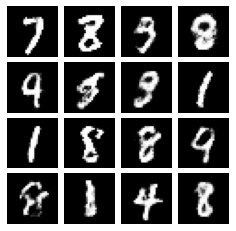

Iteration:52000
Discriminator loss: 0.508
Generator loss: 2.68



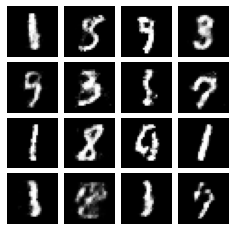

Iteration:54000
Discriminator loss: 0.598
Generator loss: 2.4



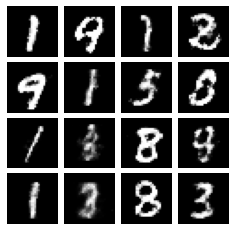

Iteration:56000
Discriminator loss: 0.708
Generator loss: 2.48



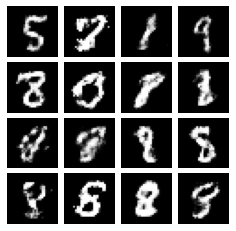

Iteration:58000
Discriminator loss: 0.591
Generator loss: 2.61



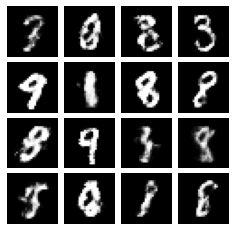

Iteration:60000
Discriminator loss: 0.478
Generator loss: 2.42



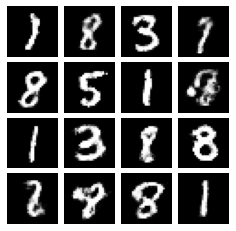

Iteration:62000
Discriminator loss: 0.505
Generator loss: 2.96



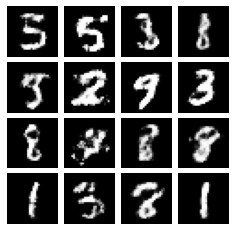

Iteration:64000
Discriminator loss: 0.515
Generator loss: 2.74



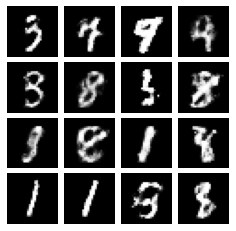

Iteration:66000
Discriminator loss: 0.529
Generator loss: 2.42



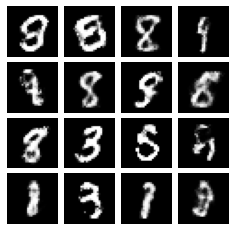

Iteration:68000
Discriminator loss: 0.546
Generator loss: 2.63



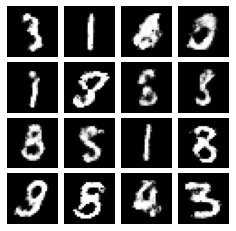

Iteration:70000
Discriminator loss: 0.476
Generator loss: 2.82



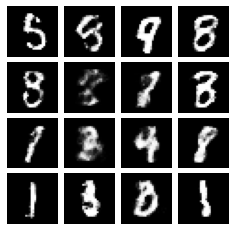

Iteration:72000
Discriminator loss: 0.607
Generator loss: 2.9



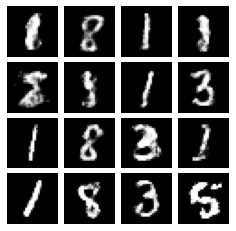

Iteration:74000
Discriminator loss: 0.463
Generator loss: 2.67



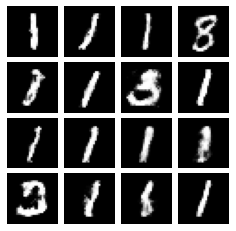

Iteration:76000
Discriminator loss: 0.417
Generator loss: 2.72



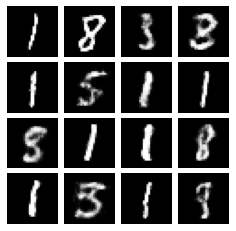

Iteration:78000
Discriminator loss: 0.466
Generator loss: 2.21



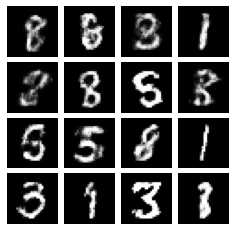

Iteration:80000
Discriminator loss: 0.637
Generator loss: 2.94



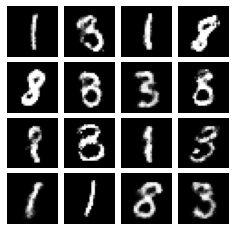

Iteration:82000
Discriminator loss: 0.509
Generator loss: 2.95



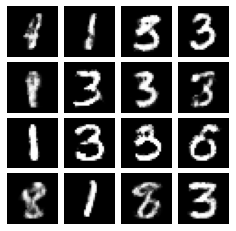

Iteration:84000
Discriminator loss: 0.586
Generator loss: 2.41



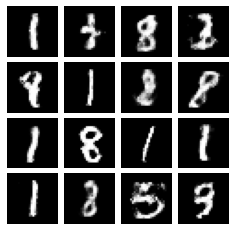

Iteration:86000
Discriminator loss: 0.385
Generator loss: 2.56



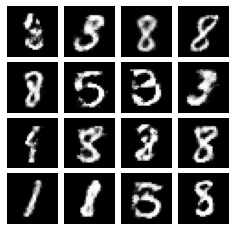

Iteration:88000
Discriminator loss: 0.472
Generator loss: 2.23



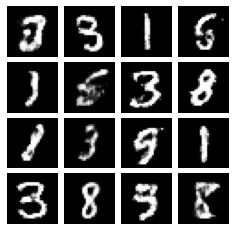

Iteration:90000
Discriminator loss: 0.501
Generator loss: 2.75



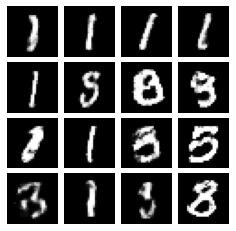

Iteration:92000
Discriminator loss: 0.446
Generator loss: 2.52



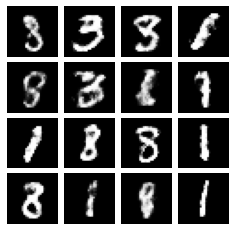

Iteration:94000
Discriminator loss: 0.515
Generator loss: 2.3



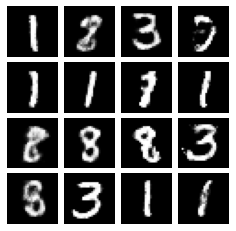

Iteration:96000
Discriminator loss: 0.529
Generator loss: 2.45



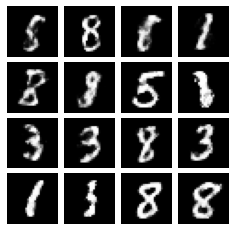

Iteration:98000
Discriminator loss: 0.465
Generator loss: 2.76



In [68]:
i = 0
for j in range(100000):
    if j % 2000 == 0:
        samples = sess.run(sample_gen , feed_dict={Z: random_Z(16, dim_Z)})
        fig = plot(samples)
        plt.show()
        i+=1
        plt.close(fig)
    X_batch, _ = mnist.train.next_batch(batch_size)
    _,loss_curr_dis = sess.run([solver_dis, loss_dis], feed_dict={X:X_batch, Z:random_Z(batch_size, dim_Z)})
    _,loss_curr_gen = sess.run([solver_gen, loss_gen], feed_dict={Z:random_Z(batch_size, dim_Z)})

    if j % 2000 == 0:
        print('Iteration:{}'.format(j))
        print('Discriminator loss: {:.3}'.format(loss_curr_dis))
        print('Generator loss: {:.3}'.format(loss_curr_gen))
        print()

정확도:0.9688000082969666
